In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.linear_model import Perceptron
import seaborn as sns


In [2]:
def txt2df(path):
    store=[]
    with open(path) as f:
        
        #read line by line
        for line in f.readlines():
            temp={}
            
            #split line by space
            splitword=line.split()
            count=0
            temp['label']=splitword[0]
            for i in range(1,len(splitword)):
                num=splitword[i]
                
                #input = 1:-0.1
                #after = -0.1
                result = num.index(':')+1
                num=num[result:]
                temp[f'{count}']=num
                count+=1
            store.append(temp)
    f.close()
    
    #convert dict to dataframe
    df=pd.DataFrame(store)
    df['label']=df['label'].astype(int,errors='raise')
    
    #convert object to float64
    for i in range(0,8):
        df[f'{i}'] = df[f'{i}'].astype('float64', errors = 'raise')
    return df


In [3]:
def splitdata(df):
    
    #split data into 60/20/20
    bigtrain_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
    train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, stratify=bigtrain_set['label'])
    return train_set,val_set,test_set

In [4]:
def splitlabel(df):
    features = df.iloc[:,1:].values
    label = df.iloc[:,0].values
    return features,label

In [5]:
class Perceptron:
    def __init__(self,features):
        np.random.seed(0)
        self.model=None
        self.mode2=None
        
        # w = all zeros weights, w2 = random weights
        self.w = np.zeros(features.shape[1])
        self.w2= np.random.random_sample(features.shape[1])
        
    def sign(self,input):
        return True if (input>=0) else False
    
    
    def summation(self,features,labels,weight):
        Sum=np.zeros(features.shape[1])
        
        for i in range(features.shape[0]):
            temp = np.dot(labels[i],features[i])
            
            if np.dot(features[i],weight) < 0 and labels[i] == 1:
                Sum=np.add(Sum,np.dot(temp,1))
                
            if np.dot(features[i],weight) >= 0 and labels[i] == -1:
                Sum=np.add(Sum,np.dot(temp,1))

        return Sum
    
    def training(self,features,labels,step,T,act):
        
        for i in range(1,T+1):
            summ =self.summation(features,labels,self.w)
            self.w=self.w+(step*summ)
        self.model = self.w
    
    def randtrain(self,features,labels,step,T,act):
        for i in range(1,T+1):
            summ =self.summation(features,labels,self.w2)
            self.w2=self.w2+(step*summ)
        self.model2=self.w2
            
    def Predict(self,features,act,modelUsed):
        
        ans = np.zeros(features.shape[0])
        
        for i in range(features.shape[0]):
            ans[i] = 1 if act(sum(features[i]*modelUsed)) else -1
        
        return ans
        

In [6]:
def ploting(input,learn,data1,data2,name):
    size=[]
    train=[]
    test=[]
    for key in input:
        size.append(key)
        train.append(input.get(key)[1])
        test.append(input.get(key)[0])
    
    plt.plot(size,train,label =data1)
    plt.plot(size,test,label=data2)
    
    plt.title(f'{name} with learning rate={learn}')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [7]:
# text to dataframe, types from object to float or int
store=txt2df("data.txt")

#split data in 60:20:20
train,valid,test = splitdata(store)

#spliting data in labels and features
train_X,train_y=splitlabel(train)
valid_X,valid_y=splitlabel(valid)
test_X,test_y=splitlabel(test)

In [8]:
# confirm successful to convert 
print(f'{train_X.shape} and {train_y.shape},{valid_X.shape} and,{valid_y.shape},{test_X.shape} and {test_y.shape}')

(491, 8) and (491,),(123, 8) and,(123,),(154, 8) and (154,)


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   768 non-null    int32  
 1   0       768 non-null    float64
 2   1       768 non-null    float64
 3   2       768 non-null    float64
 4   3       768 non-null    float64
 5   4       768 non-null    float64
 6   5       768 non-null    float64
 7   6       768 non-null    float64
 8   7       759 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 51.1 KB


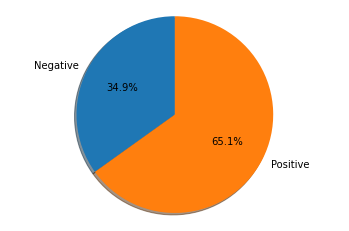

In [10]:
labels = 'Negative','Positive'
sizes = [len(store[store['label']==-1]),len(store[store['label']==1])]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Proportion of labels in diabetes dataset')
plt.show()


In [12]:
# all zeros weight
def experiment(learn,epoch):
    temp={}
    for i in range(1,epoch+1):
        Train=Perceptron(train_X)
        Train.training(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model)
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','All zero weight')
    return temp

In [13]:
#random weight
def randomexp(learn,epoch):
    temp={}
    for i in range(1,epoch+1):
        Train=Perceptron(train_X)
        Train.randtrain(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','Random weight')
    return temp

In [14]:
def ploting2(input,learn:list,data1,data2,name):
    size=[]
    train=[]
    test=[]
    print(len(input))
    for key in input:
        size.append(key)
        train.append(input.get(key)[1])
        test.append(input.get(key)[0])
    
    plt.plot(size,train,label =data1)
    plt.plot(size,test,label=data2)
    

    plt.xlabel("learning rate")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

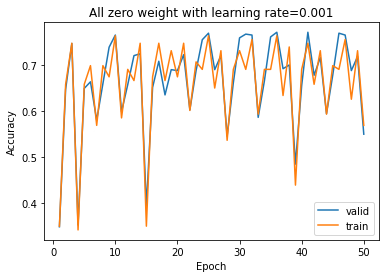

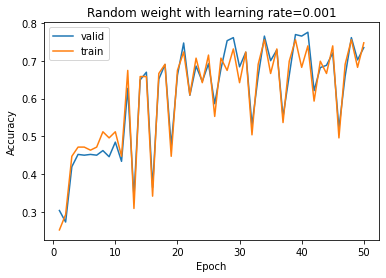

In [15]:
out1=experiment(0.001,50)
radout1=randomexp(0.001,50)

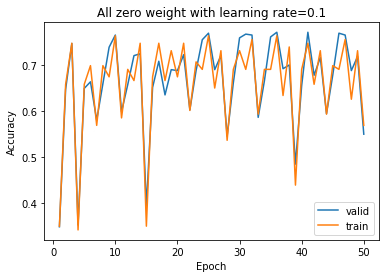

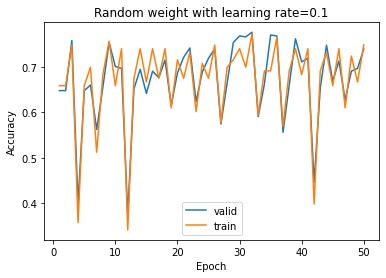

In [16]:
out2=experiment(0.1,50)
radout2=randomexp(0.1,50)

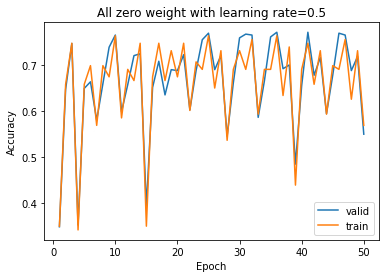

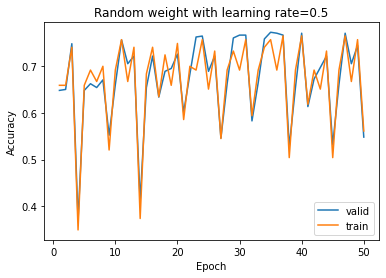

In [17]:
out3=experiment(0.5,50)
radout3=randomexp(0.5,50)

In [18]:
class PerceptronWithBias:
    def __init__(self,features):
        np.random.seed(0)
        self.model=None
        self.mode2=None
        # w = all zeros weights, w2 = random weights
        self.w = np.zeros(features.shape[1])
        self.w2=np.random.random_sample(features.shape[1])
        self.w = np.append(1, self.w)
        self.w2= np.append(1, self.w2)
        
    def sign(self,input):
        return True if (input>=0) else False
    
    
    def summation(self,features,labels,weight):
        Sum=np.zeros(features.shape[1])
        Sum[0]=1
        for i in range(features.shape[0]):
            temp = np.dot(labels[i],features[i])
            if np.dot(features[i],weight) < 0 and labels[i] == 1:
                Sum=np.add(Sum,np.dot(temp,1))
                
            if np.dot(features[i],weight) >= 0 and labels[i] == -1:
                Sum=np.add(Sum,np.dot(temp,1))

        return Sum
    def append1(self,sets):
        temp =np.ones((sets.shape[0],sets.shape[1]+1))
        for i in range(sets.shape[0]):
            for k in range(sets.shape[1]):
                temp[i][k+1]=sets[i][k]
        return temp
        
    def training(self,features,labels,step,T,act):
        
        newfeat =self.append1(features)
        for i in range(1,T+1):
            summ =self.summation(newfeat,labels,self.w)
            self.w=self.w+(step*summ)
        self.model = self.w
    
    def randtrain(self,features,labels,step,T,act):
        newfeat =self.append1(features)
        for i in range(1,T+1):
            summ =self.summation(newfeat,labels,self.w2)
            self.w2=self.w2+(step*summ)
        self.model2=self.w2
            
    def Predict(self,features,act,modelUsed):
        
        ans = np.zeros(features.shape[0])
        features=self.append1(features)
        for i in range(features.shape[0]):
            ans[i] = 1 if act(sum(features[i]*modelUsed)) else -1
        
        return ans

In [19]:
def randombias(learn,epoch):
    temp={}
    for i in range(1,epoch+1):
        Train=PerceptronWithBias(train_X)
        Train.randtrain(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','Random weight')
    return temp

In [20]:
bias = PerceptronWithBias(train_X)
bias.training(train_X,train_y,0.01,60,bias.sign)
output = bias.Predict(test_X,Train.sign,bias.model)
accuracy_score(test_y, output)

0.6558441558441559

In [21]:
def Zerobias(learn,epoch):
    temp={}
    for i in range(1,epoch+1):
        Train=PerceptronWithBias(train_X)
        Train.training(train_X,train_y,0.01,i,bias.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model)
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','All zero weight')
    return temp

In [22]:
def lrchange():
    temp={}
    rate =[]
    for i in np.arange(1,0.001,-0.01):
        rate.append(i)
        Train=PerceptronWithBias(train_X)
        Train.randtrain(train_X,train_y,i,50,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
#         print(temp)
    ploting2(temp,np.arange(1,0.001,-0.01),'valid','train','Random weight')
    return temp,rate

100


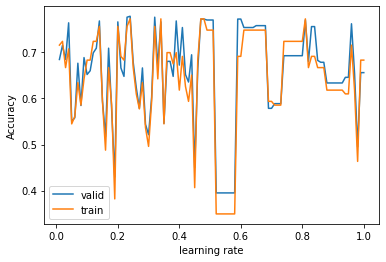

In [30]:
temp,rate=lrchange()

In [24]:
def compar(input1,input2,learn,data1,data2):
    size=[]
    withbias=[]
    without=[]
    count=0
    for key in input1:
        size.append(count)
        count+=1
        withbias.append(input1.get(key)[0])
        
    for key in input2:
        without.append(input2.get(key)[0])
        
    plt.plot(size,withbias,label =data1)
    plt.plot(size,without,label=data2)
    
#     plt.title(f'Compare with bias and without bias on validation set')
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

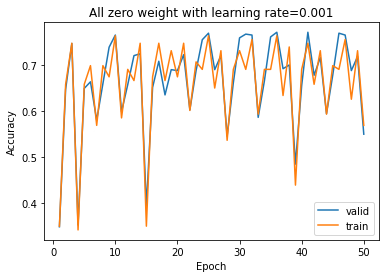

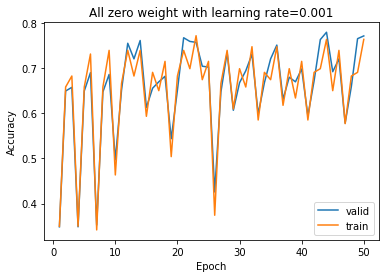

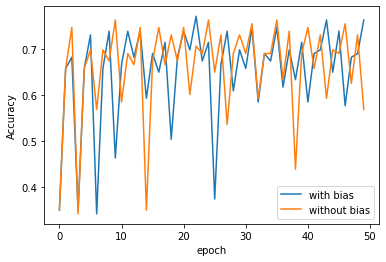

In [25]:
#compare weights with bias and without bias
out1=experiment(0.001,50)
out2=Zerobias(0.001,50)
compar(out2,out1,0.001,"with bias","without bias")

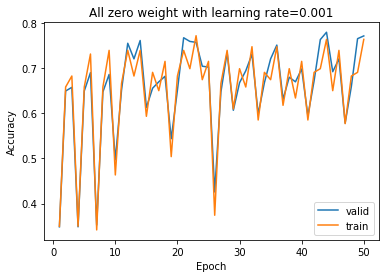

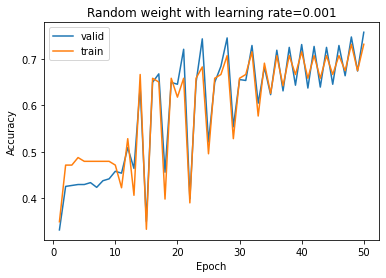

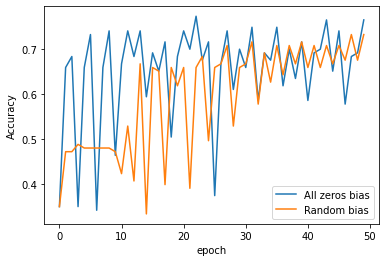

In [26]:
#compare all zeros bias and random bias
out2=Zerobias(0.001,50)
out1=randombias(0.001,50)
compar(out2,out1,0.001,"All zeros bias","Random bias")

In [27]:
unbiased_X =np.concatenate((train_X, valid_X), axis=0)
unbiased_y =np.concatenate((train_X, valid_X), axis=0)

Accuracy= 0.7467532467532467
f1= 0.8202764976958524
pre= 0.7606837606837606
recall= 0.89
roc= 0.6857407407407408


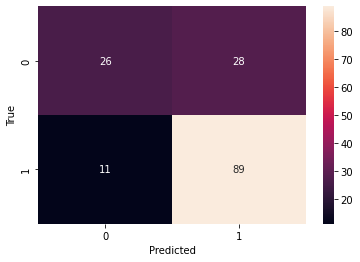

In [28]:
Train=PerceptronWithBias(train_X)
Train.randtrain(train_X,train_y,0.23999999999999932,50,Train.sign)
test_pred=  Train.Predict(test_X,Train.sign,Train.model2)
print(f'Accuracy= {accuracy_score(test_y, test_pred)}')
print(f'f1= {f1_score(test_y, test_pred)}')
print(f'pre= {precision_score(test_y, test_pred)}')
print(f'recall= {recall_score(test_y, test_pred)}')
print(f'roc= {roc_auc_score(test_y, test_pred)}')

cmat=confusion_matrix(test_y,test_pred)
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()